C:\Temp\ipykernel_13132\1622415045.py:143: RuntimeWarning: invalid value encountered in divide
  fxy = fxy / norme
C:\Temp\ipykernel_13132\1622415045.py:144: RuntimeWarning: invalid value encountered in divide
  gxy = gxy / norme


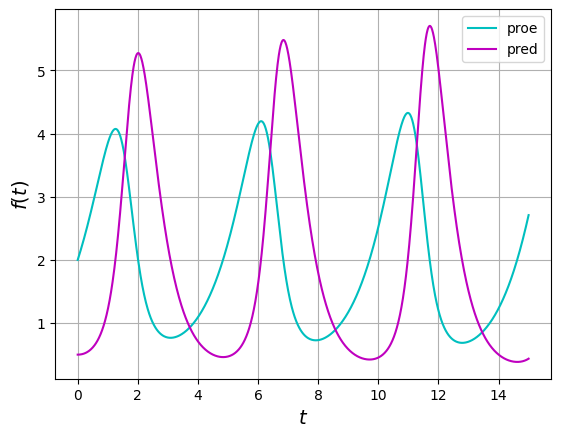

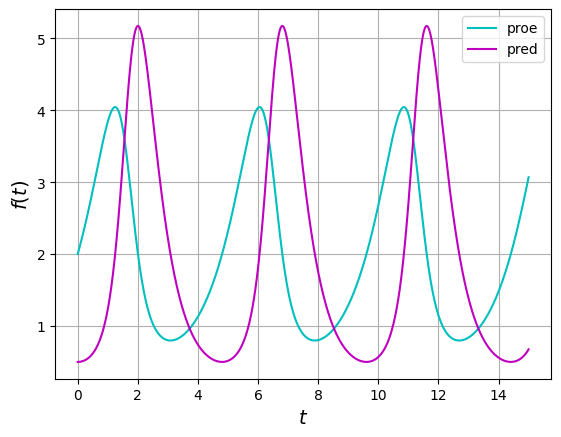

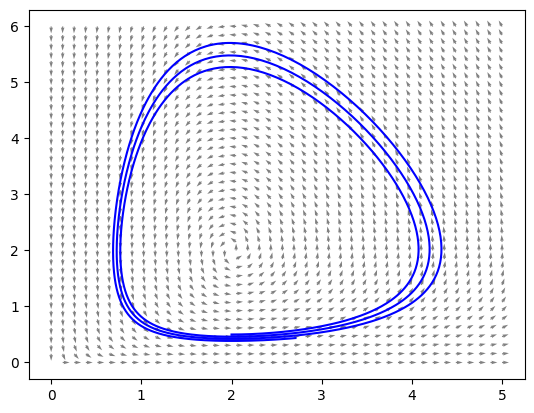

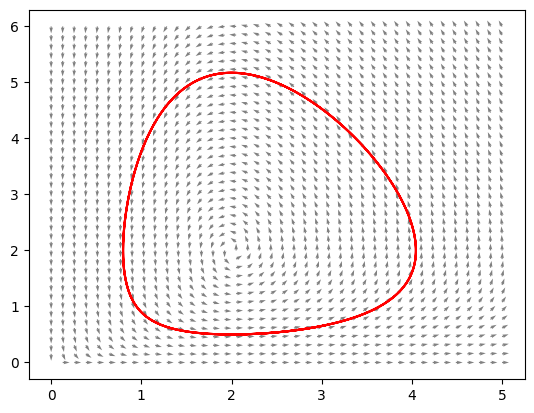

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# définition des fonctions f et g 
def f(t, x, y):
    alpha = 1.0  # taux de reproduction des proies
    beta = 0.5   # taux de mortalité des proies
    return x*(alpha - beta*y)


def g(t, x, y):
    gamma = 2.0  # taux de reproduction des predateurs
    delta = 1.0  # taux de mortalité des predateurs
    return -y*(gamma - delta*x)

# méthode d'Euler
def fct_Euler_2D(x0, y0, tmin, tmax, pas, F, G):
    """
    Implémente la méthode d'Euler pour un système d'équations différentielles en 2D.

    Arguments :
    - x0, y0 : conditions initiales (valeurs de x et y à t = tmin)
    - tmin : début de l'intervalle de temps
    - tmax : fin de l'intervalle de temps
    - pas : pas de discrétisation
    - F : fonction F(t, x, y) définissant l'équation différentielle dx/dt = F
    - G : fonction G(t, x, y) définissant l'équation différentielle dy/dt = G

    Retourne :
    - x : tableau des valeurs de x(t)
    - y : tableau des valeurs de y(t)
    - t : tableau des instants de temps
    """
    
    t = np.arange(tmin, tmax + pas, pas)
    y = np.zeros((len(t)))
    x = np.zeros((len(t))) 

    y[0]=y0
    x[0]=x0


    for k in range(len(t)-1):
        y[k+1]=y[k] + pas*G(t[k],x[k],y[k])
        x[k+1]=x[k] + pas*F(t[k],x[k],y[k])

    

    return x, y, t

# méthode de Runge-Kutta d'ordre 2
def fct_RK2_2D(x0, y0, tmin, tmax, pas, beta, F, G):
    """
    Implémente la méthode de Runge-Kutta d'ordre 2 pour un système d'équations différentielles en 2D.

    Arguments :
    - x0, y0 : conditions initiales (valeurs de x et y à t = tmin)
    - tmin : début de l'intervalle de temps
    - tmax : fin de l'intervalle de temps
    - pas : pas de discrétisation
    - beta : paramètre de la méthode RK2 (typique : beta=0.5 pour RK classique)
    - F : fonction F(t, x, y) définissant dx/dt = F(t, x, y)
    - G : fonction G(t, x, y) définissant dy/dt = G(t, x, y)

    Retourne :
    - x : tableau des valeurs de x(t)
    - y : tableau des valeurs de y(t)
    - t : tableau des instants de temps
    """
    t = np.arange(tmin, tmax + pas, pas)
    y = np.zeros((len(t)))
    x = np.zeros((len(t)))

    t = np.arange(tmin, tmax + pas, pas)
    y = np.zeros((len(t))) 
    y[0]=y0
    x[0]=x0

    for k in range(len(t)-1):
        # Étape 1
        k1x = F(t[k], x[k], y[k])
        k1y = G(t[k], x[k], y[k])

        # Étape 2 (calcul des valeurs intermédiaires)
        k2x = F(t[k] + pas/beta, x[k] + pas * k1x / beta, y[k] + pas * k1y / beta)
        k2y = G(t[k] + pas/beta, x[k] + pas * k1x / beta, y[k] + pas * k1y / beta)

        # Mise à jour des valeurs
        x[k+1] = x[k] + pas * k2x
        y[k+1] = y[k] + pas * k2y
    
    return x, y, t



# paramètres et conditions initiales
t_min = 0.0
t_max = 15.0
h = 0.01
x0 = 2.0  # population initiale des proies
y0 = 0.5  # population initiale des prédateurs
beta_RK = 2

# méthode d'Euler
xEuler, yEuler, t = fct_Euler_2D(x0, y0, t_min, t_max, h, f, g)

# méthode de Runge-Kutta d'ordre 2
xRK2, yRK2, t = fct_RK2_2D(x0, y0, t_min, t_max, h, beta_RK, f, g)

# affichages des populations vs temps (Euler)
# affichage 1
plt.figure(1)
plt.plot(t, xEuler[:], 'c', label='proe')
plt.plot(t, yEuler[:], 'm', label='pred')


lg = plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$f(t)$', fontsize=14)
plt.grid(True)

# affichages des populations vs temps (RK2)
plt.figure(2)
# affichage 1
plt.plot(t, xRK2[:], 'c', label='proe')
plt.plot(t, yRK2[:], 'm', label='pred')


lg = plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$f(t)$', fontsize=14)
plt.grid(True)

#### affichage des trajectoires et du champ de vecteurs (décommenter et compléter le code ci-dessous)

N = 40
ux = np.linspace(0, 5, N)
uy = np.linspace(0, 6, N)
x, y = np.meshgrid(ux, uy)
fxy = f(0, x, y)
gxy = g(0, x, y)
norme = np.sqrt(fxy**2 + gxy**2)
fxy = fxy / norme
gxy = gxy / norme

# méthode d'Euler
plt.figure(3)
plt.quiver(x, y, fxy, gxy, color='gray')
plt.plot(xEuler, yEuler, 'b', label="Euler")

# méthode de Runge-Kutta d'odre 2 
plt.figure(4)
plt.quiver(x, y, fxy, gxy, color='gray')
plt.plot(xRK2, yRK2, 'r', label="RK2")



